# CS 513 Final Project - NYPD Vehicle Stop Report Data

##### Imports

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

##### Reading Data

In [98]:
df = pd.read_csv('NYPD_Vehicle_Stop_Reports_20250430.csv')
df

,EVNT_KEY,OCCUR_DT,OCCUR_TM,CMD_CD,VEH_SEIZED_FLG,VEH_SEARCHED_FLG,VEH_SEARCH_CONSENT_FLG,VEH_CHECKPOINT_FLG,FORCE_USED_FLG,ARREST_MADE_FLG,SUMMON_ISSUED_FLG,VEH_CATEGORY,RPTED_AGE,SEX_CD,RACE_DESC,LATITUDE,LONGITUDE,X_COORD_CD,Y_COORD_CD
0,284650033,04/02/2024,07:04:00,1,False,False,(null),False,False,False,True,CAR/SUV,42,M,BLACK,40.722253,-74.005913,982611.0,202413.0
1,284650036,04/02/2024,08:56:00,5,False,False,(null),False,False,False,True,CAR/SUV,33,M,HISPANIC,40.718457,-73.994809,985689.0,201030.0
2,284650037,04/02/2024,07:48:00,5,False,False,(null),False,False,False,True,CAR/SUV,42,M,BLACK,40.718457,-73.994809,985689.0,201030.0
3,284650038,04/02/2024,04:55:00,7,False,False,(null),False,False,False,False,CAR/SUV,49,M,WHITE,40.715954,-73.986721,987931.0,200118.0
4,284650039,04/02/2024,07:10:00,7,False,False,(null),False,False,False,False,CAR/SUV,36,M,WHITE,40.715954,-73.986721,987931.0,200118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,(null),False,False,False,True,CAR/SUV,32,M,HISPANIC,0.000000,0.000000,1008705.0,193427.0
677664,304404690,03/31/2025,9:00:00,109,False,False,(null),False,False,False,False,CAR/SUV,46,M,ASIAN / PACIFIC ISLANDER,0.000000,0.000000,1031437.0,216900.0
677665,304404735,03/31/2025,17:30:00,110,False,False,(null),False,False,False,False,CAR/SUV,33,M,ASIAN / PACIFIC ISLANDER,40.757683,-73.844416,1027233.0,215480.0
677666,304424562,03/31/2025,23:24:00,47,False,False,(null),False,False,True,False,CAR/SUV,22,M,HISPANIC,40.893325,-73.860813,1022790.0,264806.0


## Data Manipulation & Cleaning

In [99]:
df_cleaned = df.copy()

df_cleaned = df_cleaned.rename(columns={
    'EVNT_KEY': 'event_id',
    'OCCUR_DT': 'stop_date',
    'OCCUR_TM': 'stop_time',
    'CMD_CD': 'command_code',
    'VEH_SEIZED_FLG': 'vehicle_seized',
    'VEH_SEARCHED_FLG': 'vehicle_searched',
    'VEH_SEARCH_CONSENT_FLG': 'search_consent',
    'VEH_CHECKPOINT_FLG': 'checkpoint_stop',
    'FORCE_USED_FLG': 'force_used',
    'ARREST_MADE_FLG': 'arrest_made',
    'SUMMON_ISSUED_FLG': 'summons_issued',
    'VEH_CATEGORY': 'vehicle_type',
    'RPTED_AGE': 'driver_age',
    'SEX_CD': 'driver_sex',
    'RACE_DESC': 'driver_race',
    'LATITUDE': 'latitude',
    'LONGITUDE': 'longitude',
    'X_COORD_CD': 'x_coord',
    'Y_COORD_CD': 'y_coord',
    'datetime': 'stop_datetime'
})

df_cleaned

,event_id,stop_date,stop_time,command_code,vehicle_seized,vehicle_searched,search_consent,checkpoint_stop,force_used,arrest_made,summons_issued,vehicle_type,driver_age,driver_sex,driver_race,latitude,longitude,x_coord,y_coord
0,284650033,04/02/2024,07:04:00,1,False,False,(null),False,False,False,True,CAR/SUV,42,M,BLACK,40.722253,-74.005913,982611.0,202413.0
1,284650036,04/02/2024,08:56:00,5,False,False,(null),False,False,False,True,CAR/SUV,33,M,HISPANIC,40.718457,-73.994809,985689.0,201030.0
2,284650037,04/02/2024,07:48:00,5,False,False,(null),False,False,False,True,CAR/SUV,42,M,BLACK,40.718457,-73.994809,985689.0,201030.0
3,284650038,04/02/2024,04:55:00,7,False,False,(null),False,False,False,False,CAR/SUV,49,M,WHITE,40.715954,-73.986721,987931.0,200118.0
4,284650039,04/02/2024,07:10:00,7,False,False,(null),False,False,False,False,CAR/SUV,36,M,WHITE,40.715954,-73.986721,987931.0,200118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,(null),False,False,False,True,CAR/SUV,32,M,HISPANIC,0.000000,0.000000,1008705.0,193427.0
677664,304404690,03/31/2025,9:00:00,109,False,False,(null),False,False,False,False,CAR/SUV,46,M,ASIAN / PACIFIC ISLANDER,0.000000,0.000000,1031437.0,216900.0
677665,304404735,03/31/2025,17:30:00,110,False,False,(null),False,False,False,False,CAR/SUV,33,M,ASIAN / PACIFIC ISLANDER,40.757683,-73.844416,1027233.0,215480.0
677666,304424562,03/31/2025,23:24:00,47,False,False,(null),False,False,True,False,CAR/SUV,22,M,HISPANIC,40.893325,-73.860813,1022790.0,264806.0


In [100]:
# Combine stop_date and stop_time into a datetime column
df_cleaned['stop_datetime'] = pd.to_datetime(df_cleaned['stop_date'] + ' ' + df_cleaned['stop_time'], errors='coerce')

# Extract parts of the date
df_cleaned['stop_dayofweek'] = df_cleaned['stop_datetime'].dt.day_name()
df_cleaned['stop_month'] = df_cleaned['stop_datetime'].dt.month
df_cleaned['stop_year'] = df_cleaned['stop_datetime'].dt.year

# Map months to seasons (Northern Hemisphere)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_cleaned['stop_season'] = df_cleaned['stop_month'].apply(get_season)

df_cleaned

,event_id,stop_date,stop_time,command_code,vehicle_seized,vehicle_searched,search_consent,checkpoint_stop,force_used,arrest_made,...,driver_race,latitude,longitude,x_coord,y_coord,stop_datetime,stop_dayofweek,stop_month,stop_year,stop_season
0,284650033,04/02/2024,07:04:00,1,False,False,(null),False,False,False,...,BLACK,40.722253,-74.005913,982611.0,202413.0,2024-04-02 07:04:00,Tuesday,4,2024,Spring
1,284650036,04/02/2024,08:56:00,5,False,False,(null),False,False,False,...,HISPANIC,40.718457,-73.994809,985689.0,201030.0,2024-04-02 08:56:00,Tuesday,4,2024,Spring
2,284650037,04/02/2024,07:48:00,5,False,False,(null),False,False,False,...,BLACK,40.718457,-73.994809,985689.0,201030.0,2024-04-02 07:48:00,Tuesday,4,2024,Spring
3,284650038,04/02/2024,04:55:00,7,False,False,(null),False,False,False,...,WHITE,40.715954,-73.986721,987931.0,200118.0,2024-04-02 04:55:00,Tuesday,4,2024,Spring
4,284650039,04/02/2024,07:10:00,7,False,False,(null),False,False,False,...,WHITE,40.715954,-73.986721,987931.0,200118.0,2024-04-02 07:10:00,Tuesday,4,2024,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,(null),False,False,False,...,HISPANIC,0.000000,0.000000,1008705.0,193427.0,2025-03-31 16:15:00,Monday,3,2025,Spring
677664,304404690,03/31/2025,9:00:00,109,False,False,(null),False,False,False,...,ASIAN / PACIFIC ISLANDER,0.000000,0.000000,1031437.0,216900.0,2025-03-31 09:00:00,Monday,3,2025,Spring
677665,304404735,03/31/2025,17:30:00,110,False,False,(null),False,False,False,...,ASIAN / PACIFIC ISLANDER,40.757683,-73.844416,1027233.0,215480.0,2025-03-31 17:30:00,Monday,3,2025,Spring
677666,304424562,03/31/2025,23:24:00,47,False,False,(null),False,False,True,...,HISPANIC,40.893325,-73.860813,1022790.0,264806.0,2025-03-31 23:24:00,Monday,3,2025,Spring


In [101]:
# Extract hour from stop_datetime
df_cleaned['stop_hour'] = df_cleaned['stop_datetime'].dt.hour

# Categorize time of day
def get_time_of_day(hour):
    if hour >= 0 and hour < 6:
        return 'Late Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df_cleaned['stop_time_of_day'] = df_cleaned['stop_hour'].apply(get_time_of_day)
df_cleaned


,event_id,stop_date,stop_time,command_code,vehicle_seized,vehicle_searched,search_consent,checkpoint_stop,force_used,arrest_made,...,longitude,x_coord,y_coord,stop_datetime,stop_dayofweek,stop_month,stop_year,stop_season,stop_hour,stop_time_of_day
0,284650033,04/02/2024,07:04:00,1,False,False,(null),False,False,False,...,-74.005913,982611.0,202413.0,2024-04-02 07:04:00,Tuesday,4,2024,Spring,7,Morning
1,284650036,04/02/2024,08:56:00,5,False,False,(null),False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 08:56:00,Tuesday,4,2024,Spring,8,Morning
2,284650037,04/02/2024,07:48:00,5,False,False,(null),False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 07:48:00,Tuesday,4,2024,Spring,7,Morning
3,284650038,04/02/2024,04:55:00,7,False,False,(null),False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 04:55:00,Tuesday,4,2024,Spring,4,Late Night
4,284650039,04/02/2024,07:10:00,7,False,False,(null),False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 07:10:00,Tuesday,4,2024,Spring,7,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,(null),False,False,False,...,0.000000,1008705.0,193427.0,2025-03-31 16:15:00,Monday,3,2025,Spring,16,Afternoon
677664,304404690,03/31/2025,9:00:00,109,False,False,(null),False,False,False,...,0.000000,1031437.0,216900.0,2025-03-31 09:00:00,Monday,3,2025,Spring,9,Morning
677665,304404735,03/31/2025,17:30:00,110,False,False,(null),False,False,False,...,-73.844416,1027233.0,215480.0,2025-03-31 17:30:00,Monday,3,2025,Spring,17,Afternoon
677666,304424562,03/31/2025,23:24:00,47,False,False,(null),False,False,True,...,-73.860813,1022790.0,264806.0,2025-03-31 23:24:00,Monday,3,2025,Spring,23,Evening


In [102]:
# Convert command_code to string type
df_cleaned['command_code'] = df_cleaned['command_code'].astype(str)

# Show unique values and type confirmation
df_cleaned['command_code'].unique()[:10], df_cleaned['command_code'].dtype
df_cleaned


,event_id,stop_date,stop_time,command_code,vehicle_seized,vehicle_searched,search_consent,checkpoint_stop,force_used,arrest_made,...,longitude,x_coord,y_coord,stop_datetime,stop_dayofweek,stop_month,stop_year,stop_season,stop_hour,stop_time_of_day
0,284650033,04/02/2024,07:04:00,1,False,False,(null),False,False,False,...,-74.005913,982611.0,202413.0,2024-04-02 07:04:00,Tuesday,4,2024,Spring,7,Morning
1,284650036,04/02/2024,08:56:00,5,False,False,(null),False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 08:56:00,Tuesday,4,2024,Spring,8,Morning
2,284650037,04/02/2024,07:48:00,5,False,False,(null),False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 07:48:00,Tuesday,4,2024,Spring,7,Morning
3,284650038,04/02/2024,04:55:00,7,False,False,(null),False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 04:55:00,Tuesday,4,2024,Spring,4,Late Night
4,284650039,04/02/2024,07:10:00,7,False,False,(null),False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 07:10:00,Tuesday,4,2024,Spring,7,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,(null),False,False,False,...,0.000000,1008705.0,193427.0,2025-03-31 16:15:00,Monday,3,2025,Spring,16,Afternoon
677664,304404690,03/31/2025,9:00:00,109,False,False,(null),False,False,False,...,0.000000,1031437.0,216900.0,2025-03-31 09:00:00,Monday,3,2025,Spring,9,Morning
677665,304404735,03/31/2025,17:30:00,110,False,False,(null),False,False,False,...,-73.844416,1027233.0,215480.0,2025-03-31 17:30:00,Monday,3,2025,Spring,17,Afternoon
677666,304424562,03/31/2025,23:24:00,47,False,False,(null),False,False,True,...,-73.860813,1022790.0,264806.0,2025-03-31 23:24:00,Monday,3,2025,Spring,23,Evening


In [103]:
df_cleaned['search_consent'] = df_cleaned['search_consent'].replace({'(null)': None})
df_cleaned['search_consent'] = df_cleaned['search_consent'].map({
    'Y': 'CONSENTED',
    'N': 'DENIED'
}).fillna('UNKNOWN')

df_cleaned

,event_id,stop_date,stop_time,command_code,vehicle_seized,vehicle_searched,search_consent,checkpoint_stop,force_used,arrest_made,...,longitude,x_coord,y_coord,stop_datetime,stop_dayofweek,stop_month,stop_year,stop_season,stop_hour,stop_time_of_day
0,284650033,04/02/2024,07:04:00,1,False,False,UNKNOWN,False,False,False,...,-74.005913,982611.0,202413.0,2024-04-02 07:04:00,Tuesday,4,2024,Spring,7,Morning
1,284650036,04/02/2024,08:56:00,5,False,False,UNKNOWN,False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 08:56:00,Tuesday,4,2024,Spring,8,Morning
2,284650037,04/02/2024,07:48:00,5,False,False,UNKNOWN,False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 07:48:00,Tuesday,4,2024,Spring,7,Morning
3,284650038,04/02/2024,04:55:00,7,False,False,UNKNOWN,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 04:55:00,Tuesday,4,2024,Spring,4,Late Night
4,284650039,04/02/2024,07:10:00,7,False,False,UNKNOWN,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 07:10:00,Tuesday,4,2024,Spring,7,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,UNKNOWN,False,False,False,...,0.000000,1008705.0,193427.0,2025-03-31 16:15:00,Monday,3,2025,Spring,16,Afternoon
677664,304404690,03/31/2025,9:00:00,109,False,False,UNKNOWN,False,False,False,...,0.000000,1031437.0,216900.0,2025-03-31 09:00:00,Monday,3,2025,Spring,9,Morning
677665,304404735,03/31/2025,17:30:00,110,False,False,UNKNOWN,False,False,False,...,-73.844416,1027233.0,215480.0,2025-03-31 17:30:00,Monday,3,2025,Spring,17,Afternoon
677666,304424562,03/31/2025,23:24:00,47,False,False,UNKNOWN,False,False,True,...,-73.860813,1022790.0,264806.0,2025-03-31 23:24:00,Monday,3,2025,Spring,23,Evening


In [104]:
df_cleaned['vehicle_type'].unique()

array(['CAR/SUV', 'TLC', 'TRUCK/BUS', 'MCL', 'OTHER', 'BIKE', '(null)'],
      dtype=object)

In [105]:
df_cleaned['vehicle_type'] = df_cleaned['vehicle_type'].replace({'(null)': 'UNKNOWN'})
df_cleaned['vehicle_type'].unique()
df_cleaned

,event_id,stop_date,stop_time,command_code,vehicle_seized,vehicle_searched,search_consent,checkpoint_stop,force_used,arrest_made,...,longitude,x_coord,y_coord,stop_datetime,stop_dayofweek,stop_month,stop_year,stop_season,stop_hour,stop_time_of_day
0,284650033,04/02/2024,07:04:00,1,False,False,UNKNOWN,False,False,False,...,-74.005913,982611.0,202413.0,2024-04-02 07:04:00,Tuesday,4,2024,Spring,7,Morning
1,284650036,04/02/2024,08:56:00,5,False,False,UNKNOWN,False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 08:56:00,Tuesday,4,2024,Spring,8,Morning
2,284650037,04/02/2024,07:48:00,5,False,False,UNKNOWN,False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 07:48:00,Tuesday,4,2024,Spring,7,Morning
3,284650038,04/02/2024,04:55:00,7,False,False,UNKNOWN,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 04:55:00,Tuesday,4,2024,Spring,4,Late Night
4,284650039,04/02/2024,07:10:00,7,False,False,UNKNOWN,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 07:10:00,Tuesday,4,2024,Spring,7,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,UNKNOWN,False,False,False,...,0.000000,1008705.0,193427.0,2025-03-31 16:15:00,Monday,3,2025,Spring,16,Afternoon
677664,304404690,03/31/2025,9:00:00,109,False,False,UNKNOWN,False,False,False,...,0.000000,1031437.0,216900.0,2025-03-31 09:00:00,Monday,3,2025,Spring,9,Morning
677665,304404735,03/31/2025,17:30:00,110,False,False,UNKNOWN,False,False,False,...,-73.844416,1027233.0,215480.0,2025-03-31 17:30:00,Monday,3,2025,Spring,17,Afternoon
677666,304424562,03/31/2025,23:24:00,47,False,False,UNKNOWN,False,False,True,...,-73.860813,1022790.0,264806.0,2025-03-31 23:24:00,Monday,3,2025,Spring,23,Evening


In [106]:
df_cleaned['driver_age'] = pd.to_numeric(df_cleaned['driver_age'], errors='coerce')
df_cleaned = df_cleaned[(df_cleaned['driver_age'] >= 1) & (df_cleaned['driver_age'] <= 120)]
df_cleaned

,event_id,stop_date,stop_time,command_code,vehicle_seized,vehicle_searched,search_consent,checkpoint_stop,force_used,arrest_made,...,longitude,x_coord,y_coord,stop_datetime,stop_dayofweek,stop_month,stop_year,stop_season,stop_hour,stop_time_of_day
0,284650033,04/02/2024,07:04:00,1,False,False,UNKNOWN,False,False,False,...,-74.005913,982611.0,202413.0,2024-04-02 07:04:00,Tuesday,4,2024,Spring,7,Morning
1,284650036,04/02/2024,08:56:00,5,False,False,UNKNOWN,False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 08:56:00,Tuesday,4,2024,Spring,8,Morning
2,284650037,04/02/2024,07:48:00,5,False,False,UNKNOWN,False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 07:48:00,Tuesday,4,2024,Spring,7,Morning
3,284650038,04/02/2024,04:55:00,7,False,False,UNKNOWN,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 04:55:00,Tuesday,4,2024,Spring,4,Late Night
4,284650039,04/02/2024,07:10:00,7,False,False,UNKNOWN,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 07:10:00,Tuesday,4,2024,Spring,7,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,UNKNOWN,False,False,False,...,0.000000,1008705.0,193427.0,2025-03-31 16:15:00,Monday,3,2025,Spring,16,Afternoon
677664,304404690,03/31/2025,9:00:00,109,False,False,UNKNOWN,False,False,False,...,0.000000,1031437.0,216900.0,2025-03-31 09:00:00,Monday,3,2025,Spring,9,Morning
677665,304404735,03/31/2025,17:30:00,110,False,False,UNKNOWN,False,False,False,...,-73.844416,1027233.0,215480.0,2025-03-31 17:30:00,Monday,3,2025,Spring,17,Afternoon
677666,304424562,03/31/2025,23:24:00,47,False,False,UNKNOWN,False,False,True,...,-73.860813,1022790.0,264806.0,2025-03-31 23:24:00,Monday,3,2025,Spring,23,Evening


In [107]:
df_cleaned['driver_sex'] = df_cleaned['driver_sex'].where(df_cleaned['driver_sex'].isin(['M', 'F']), 'UNKNOWN')
df_cleaned['driver_sex'].unique()

/tmp/ipykernel_34727/3174821889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['driver_sex'] = df_cleaned['driver_sex'].where(df_cleaned['driver_sex'].isin(['M', 'F']), 'UNKNOWN')


array(['M', 'F', 'UNKNOWN'], dtype=object)

In [108]:
df_cleaned['driver_race'] = df_cleaned['driver_race'].replace({'(null)': 'UNKNOWN'})
df_cleaned['driver_race'] = df_cleaned['driver_race'].replace({
    '(null)': 'UNKNOWN',
    'BLACK HISPANIC': 'HISPANIC',
    'WHITE HISPANIC': 'HISPANIC',
    'ASIAN / PACIFIC ISLANDER': 'ASIAN',
    'AMERICAN INDIAN/ALASKAN NATIVE': 'NATIVE'
})
df_cleaned['driver_race'].unique()

/tmp/ipykernel_34727/2610750681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['driver_race'] = df_cleaned['driver_race'].replace({'(null)': 'UNKNOWN'})
/tmp/ipykernel_34727/2610750681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['driver_race'] = df_cleaned['driver_race'].replace({


array(['BLACK', 'HISPANIC', 'WHITE', 'UNKNOWN', 'ASIAN', 'OTHER',
       'NATIVE'], dtype=object)

In [109]:
df_cleaned = df_cleaned[
    (df_cleaned['latitude'].notnull() & df_cleaned['longitude'].notnull()) |
    (df_cleaned['x_coord'].notnull() & df_cleaned['y_coord'].notnull())
]

# Show remaining row count and a few sample coordinates
df_cleaned[['latitude', 'longitude', 'x_coord', 'y_coord']].head(), df_cleaned.shape

(    latitude  longitude   x_coord   y_coord
 0  40.722253 -74.005913  982611.0  202413.0
 1  40.718457 -73.994809  985689.0  201030.0
 2  40.718457 -73.994809  985689.0  201030.0
 3  40.715954 -73.986721  987931.0  200118.0
 4  40.715954 -73.986721  987931.0  200118.0,
 (639611, 26))

In [110]:
df_cleaned

,event_id,stop_date,stop_time,command_code,vehicle_seized,vehicle_searched,search_consent,checkpoint_stop,force_used,arrest_made,...,longitude,x_coord,y_coord,stop_datetime,stop_dayofweek,stop_month,stop_year,stop_season,stop_hour,stop_time_of_day
0,284650033,04/02/2024,07:04:00,1,False,False,UNKNOWN,False,False,False,...,-74.005913,982611.0,202413.0,2024-04-02 07:04:00,Tuesday,4,2024,Spring,7,Morning
1,284650036,04/02/2024,08:56:00,5,False,False,UNKNOWN,False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 08:56:00,Tuesday,4,2024,Spring,8,Morning
2,284650037,04/02/2024,07:48:00,5,False,False,UNKNOWN,False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 07:48:00,Tuesday,4,2024,Spring,7,Morning
3,284650038,04/02/2024,04:55:00,7,False,False,UNKNOWN,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 04:55:00,Tuesday,4,2024,Spring,4,Late Night
4,284650039,04/02/2024,07:10:00,7,False,False,UNKNOWN,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 07:10:00,Tuesday,4,2024,Spring,7,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,UNKNOWN,False,False,False,...,0.000000,1008705.0,193427.0,2025-03-31 16:15:00,Monday,3,2025,Spring,16,Afternoon
677664,304404690,03/31/2025,9:00:00,109,False,False,UNKNOWN,False,False,False,...,0.000000,1031437.0,216900.0,2025-03-31 09:00:00,Monday,3,2025,Spring,9,Morning
677665,304404735,03/31/2025,17:30:00,110,False,False,UNKNOWN,False,False,False,...,-73.844416,1027233.0,215480.0,2025-03-31 17:30:00,Monday,3,2025,Spring,17,Afternoon
677666,304424562,03/31/2025,23:24:00,47,False,False,UNKNOWN,False,False,True,...,-73.860813,1022790.0,264806.0,2025-03-31 23:24:00,Monday,3,2025,Spring,23,Evening


## Data Visualizations

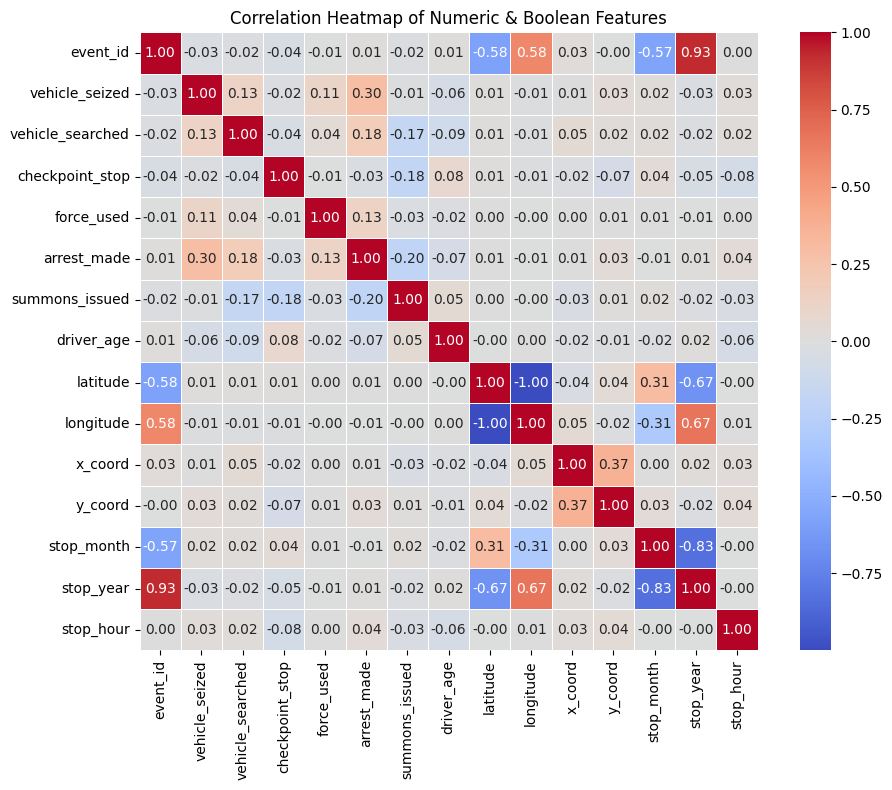

In [111]:
numeric_corr = df_cleaned.select_dtypes(include=['number', 'bool']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric & Boolean Features")
plt.tight_layout()
plt.show()

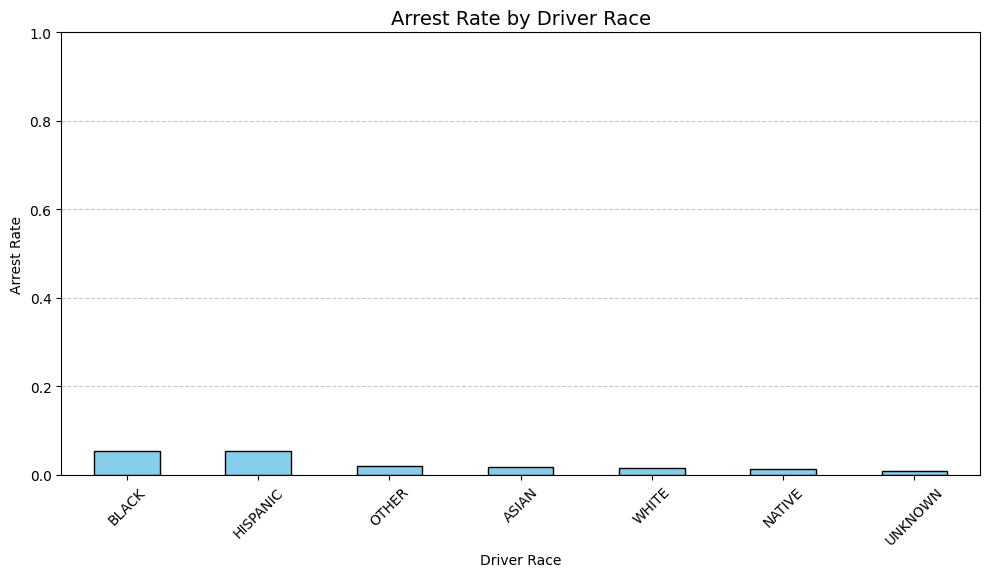

In [112]:
df_cleaned = pd.read_csv('nypd_vehicle_stops_cleaned.csv')

# Calculate arrest rate by driver race
race_arrest_stats = (
    df_cleaned.groupby("driver_race")["arrest_made"]
    .agg(["count", "sum"])
    .rename(columns={"count": "total_stops", "sum": "arrests"})
)
race_arrest_stats["arrest_rate"] = race_arrest_stats["arrests"] / race_arrest_stats["total_stops"]

# Plot
plt.figure(figsize=(10, 6))
race_arrest_stats["arrest_rate"].sort_values(ascending=False).plot(
    kind="bar", color="skyblue", edgecolor="black"
)
plt.title("Arrest Rate by Driver Race", fontsize=14)
plt.ylabel("Arrest Rate")
plt.xlabel("Driver Race")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## Data Modeling

##### New CSV of clean data

In [115]:
# Print to CSV
df_cleaned.to_csv("nypd_vehicle_stops_cleaned.csv", index=False)

# Smaller sample for github
df_cleaned_sample = df_cleaned.sample(n=10000, random_state=42)
df_cleaned_sample.to_csv("nypd_vehicle_stops_sample.csv", index=False)


In [114]:
df_clean = pd.read_csv("nypd_vehicle_stops_cleaned.csv")

#### Logistic Regression